In [1]:
class Fuzzy:
    def __init__(self, min_value, max_value):
        self.min = min_value
        self.max = max_value

    def down(self, x):
        return (self.max - x) / (self.max - self.min)

    def up(self, x):
        return (x - self.min) / (self.max - self.min)

    def rev_down(self, fuzzy_value):
        return self.max - fuzzy_value * (self.max - self.min)

    def rev_up(self, fuzzy_value):
        return fuzzy_value * (self.max - self.min) + self.min


class Demand(Fuzzy):
    def __init__(self):
        super().__init__(1000, 5000)

    def decrease(self, x):
        if x <= self.min:
            return 1
        elif self.min < x <= 3000:
            return (3000 - x) / 2000
        else:
            return 0

    def steady(self, x):
        if 1000 < x <= 3000:
            return (x - 1000) / 2000
        elif 3000 < x <= 5000:
            return (5000 - x) / 2000
        else:
            return 0

    def increase(self, x):
        if x <= 3000:
            return 0
        elif 3000 < x <= self.max:
            return (x - 3000) / 2000
        else:
            return 1


class Stock(Fuzzy):
    def __init__(self):
        super().__init__(200, 800)

    def a_few(self, x):
        if x <= self.min:
            return 1
        elif self.min < x <= 400:
            return (400 - x) / 200
        else:
            return 0

    def medium(self, x):
        if 200 < x <= 400:
            return (x - 200) / 200
        elif 400 < x <= 600:
            return 1
        elif 600 < x <= 800:
            return (800 - x) / 200
        else:
            return 0

    def a_lot(self, x):
        if x <= 600:
            return 0
        elif 600 < x <= self.max:
            return (x - 600) / 200
        else:
            return 1


class Production(Fuzzy):
    def __init__(self):
        super().__init__(2000, 8000)

    def reduce(self, fuzzy_value):
        return self.rev_down(fuzzy_value)

    def add(self, fuzzy_value):
        return self.rev_up(fuzzy_value)


# Aturan Fuzzy
rule_map = {
    ("decrease", "a_few"): "add",
    ("decrease", "medium"): "reduce",
    ("decrease", "a_lot"): "reduce",
    ("steady", "a_few"): "add",
    ("steady", "medium"): "reduce",
    ("steady", "a_lot"): "reduce",
    ("increase", "a_few"): "add",
    ("increase", "medium"): "add",
    ("increase", "a_lot"): "reduce"
}


def fuzzy_tsukamoto(demand_value, stock_value):
    demand = Demand()
    stock = Stock()
    production = Production()

    real_fuzzy_sum = 0
    fuzzy_sum = 0

    # Iterasi berdasarkan aturan fuzzy
    for (demand_key, stock_key), production_key in rule_map.items():
        fuzzy_demand = getattr(demand, demand_key)(demand_value)
        fuzzy_stock = getattr(stock, stock_key)(stock_value)
        fuzzy_prod = min(fuzzy_demand, fuzzy_stock)

        if production_key == "reduce":
            real_prod = production.reduce(fuzzy_prod)
        else:
            real_prod = production.add(fuzzy_prod)

        real_fuzzy_sum += fuzzy_prod * real_prod
        fuzzy_sum += fuzzy_prod

    if fuzzy_sum == 0:
        return 0

    return real_fuzzy_sum / fuzzy_sum


# Input
demand_value = 2500  # Nilai permintaan
stock_value = 300    # Nilai persediaan

# Metode Tsukamoto
result = fuzzy_tsukamoto(demand_value, stock_value)

# Output hasil produksi
print(f"Hasil Produksi: {result:.2f}")

Hasil Produksi: 5000.00


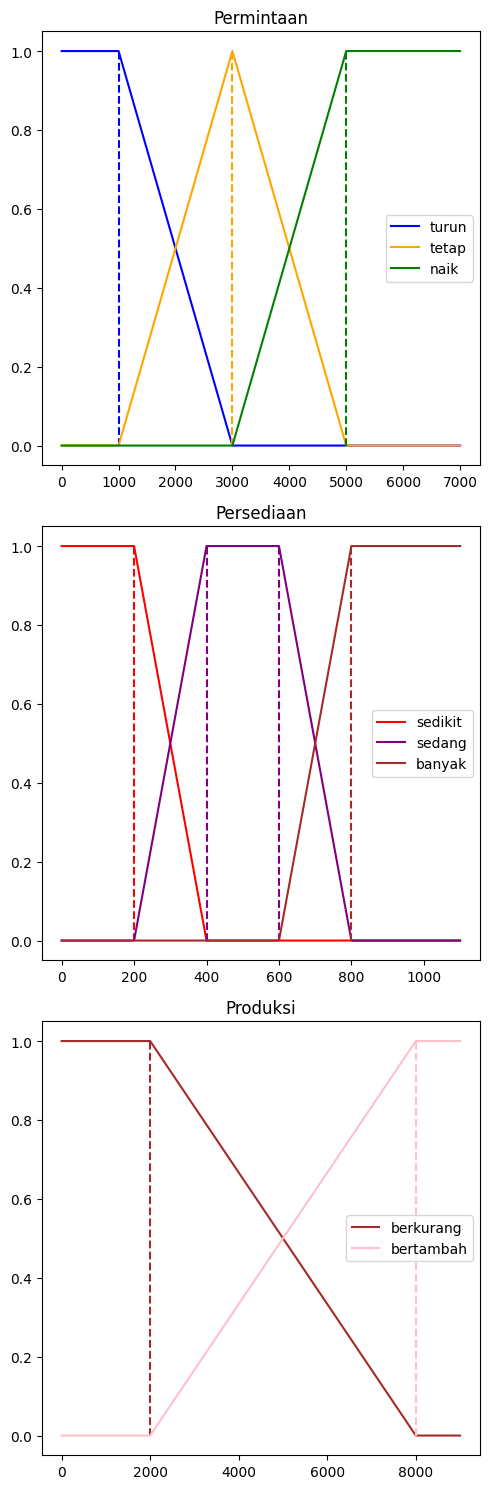

In [2]:
import matplotlib.pyplot as plt

# Range grafik
x_permintaan = range(0, 7001, 100)
x_persediaan = range(0, 1101, 50)
x_produksi = range(0, 9001, 500)

# Fungsi Permintaan
def permintaan_turun(x):
    if x <= 1000:
        return 1
    elif 1000 < x <= 3000:
        return (3000 - x) / 2000
    else:
        return 0

def permintaan_tetap(x):
    if 1000 < x <= 3000:
        return (x - 1000) / 2000
    elif 3000 < x <= 5000:
        return (5000 - x) / 2000
    else:
        return 0

def permintaan_naik(x):
    if x <= 3000:
        return 0
    elif 3000 < x <= 5000:
        return (x - 3000) / 2000
    else:
        return 1

# Fungsi Persediaan
def persediaan_sedikit(x):
    if x <= 200:
        return 1
    elif 200 < x <= 400:
        return (400 - x) / 200
    else:
        return 0

def persediaan_sedang(x):
    if 200 < x <= 400:
        return (x - 200) / 200
    elif 400 < x <= 600:
        return 1
    elif 600 < x <= 800:
        return (800 - x) / 200
    else:
        return 0

def persediaan_banyak(x):
    if x <= 600:
        return 0
    elif 600 < x <= 800:
        return (x - 600) / 200
    else:
        return 1

# Fungsi Produksi
def produksi_berkurang(x):
    if x <= 2000:
        return 1
    elif 2000 < x <= 8000:
        return (8000 - x) / 6000
    else:
        return 0

def produksi_bertambah(x):
    if x <= 2000:
        return 0
    elif 2000 < x <= 8000:
        return (x - 2000) / 6000
    else:
        return 1

# Menghitung nilai keanggotaan untuk masing-masing grafik
y_permintaan_turun = [permintaan_turun(i) for i in x_permintaan]
y_permintaan_tetap = [permintaan_tetap(i) for i in x_permintaan]
y_permintaan_naik = [permintaan_naik(i) for i in x_permintaan]

y_persediaan_sedikit = [persediaan_sedikit(i) for i in x_persediaan]
y_persediaan_sedang = [persediaan_sedang(i) for i in x_persediaan]
y_persediaan_banyak = [persediaan_banyak(i) for i in x_persediaan]

y_produksi_berkurang = [produksi_berkurang(i) for i in x_produksi]
y_produksi_bertambah = [produksi_bertambah(i) for i in x_produksi]

# subplots
fig, axes = plt.subplots(3, 1, figsize=(5, 15))

# Grafik Permintaan
axes[0].plot(x_permintaan, y_permintaan_turun, label='turun', color='blue', linestyle='solid')
axes[0].vlines(1000, 0, 1, colors='blue', linestyles='dashed')
axes[0].plot(x_permintaan, y_permintaan_tetap, label='tetap', color='orange', linestyle='solid')
axes[0].vlines(3000, 0, 1, colors='orange', linestyles='dashed')
axes[0].plot(x_permintaan, y_permintaan_naik, label='naik', color='green', linestyle='solid')
axes[0].vlines(5000, 0, 1, colors='green', linestyles='dashed')
axes[0].set_title('Permintaan')
axes[0].legend()

# Grafik Persediaan
axes[1].plot(x_persediaan, y_persediaan_sedikit, label='sedikit', color='red', linestyle='solid')
axes[1].vlines(200, 0, 1, colors='red', linestyles='dashed')
axes[1].plot(x_persediaan, y_persediaan_sedang, label='sedang', color='purple', linestyle='solid')
axes[1].vlines(400, 0, 1, colors='purple', linestyles='dashed')
axes[1].vlines(600, 0, 1, colors='purple', linestyles='dashed')
axes[1].plot(x_persediaan, y_persediaan_banyak, label='banyak', color='brown', linestyle='solid')
axes[1].vlines(800, 0, 1, colors='brown', linestyles='dashed')
axes[1].set_title('Persediaan')
axes[1].legend()

# Grafik Produksi
axes[2].plot(x_produksi, y_produksi_berkurang, label='berkurang', color='brown', linestyle='solid')
axes[2].vlines(2000, 0, 1, colors='brown', linestyles='dashed')
axes[2].plot(x_produksi, y_produksi_bertambah, label='bertambah', color='pink', linestyle='solid')
axes[2].vlines(8000, 0, 1, colors='pink', linestyles='dashed')
axes[2].set_title('Produksi')
axes[2].legend()

# grid
for ax in axes:
    ax.grid(False)

# Tampilan grafik
plt.tight_layout()
plt.show()